- 總結一下這個項目的目標以及機器學習如何有助於實現它。作為答案的一部分，提供有關數據集的一些背景知識以及如何使用它來回答項目問題。當你得到它時，數據中是否有任何異常值，你是如何處理這些異常值的？ [關鍵字：“EDA”，“Outlier”]
- 您最終在 POI 的偵測中使用了哪些特徵 (features)，以及您使用哪些方法來選擇它們？你有沒有做任何 data scaling？為什麼或者為什麼不？您應該嘗試自己設計一些新的特徵 - 解釋您嘗試製作該特徵的原因及其背後的基本原理。(您不一定要在最終分析中使用它，只需對其進行設計和測試）在 feature selection 步驟中，如果您使用了決策樹之類的算法，請同時提供您 feature importance 的數值 [關鍵字：“create feature”，“feature selection”，“normalization”]
- 您最終使用了什麼算法？您嘗試了哪些？算法之間的模型性能如何不同？ [關鍵字：“modeling”]
- 調整算法的超參數 (hyper-parameter) 是什麼意思，如果你做得不好怎麼辦？你是如何調整特定算法的參數的？你調整了什麼參數？ （有些算法沒有你需要調整的參數 - 如果你選擇的那個是這種情況，請確定並簡要說明你將如何為不是你最終選擇的模型或不同的模型做到這一點。利用參數調整，例如決策樹分類器）。 [關鍵字：“Hyper-parameter tuning”]
- 什麼是驗證，如果你做錯了，你可以犯下的經典錯誤是什麼？您是如何驗證分析的？ [關鍵字：“Hyper-parameter tuning]
- 給出至少 2 個評估指標和每個評估指標的平均表現。解釋您選擇該指標的原因。 [關鍵字：“Evaluation metrics”]


# 載入套件與相關設定

In [1]:
# 讀取相關模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
plt.style.use('seaborn') 

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# 調整寬度
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# 顯示更多columns與rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 資料整理

In [2]:
train = pd.read_csv('./Day_049_MidtermExam/train_data.csv', sep=',')
test = pd.read_csv('./Day_049_MidtermExam/test_features.csv', sep=',')
print(f'train shape :{train.shape}')
print(f'test shape :{test.shape}')

df = pd.concat([train, test], sort=False, ignore_index=True)
print(f'bniddf shape: {df.shape}')

train shape :(113, 22)
test shape :(33, 21)
bniddf shape: (146, 22)


In [3]:
# 將資料排序，便於後續資料的解讀與分析
df = df.loc[:,['name', 'email_address',
               # Payments
               'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments',
               # Stocks
               'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 
               # Messages
               'from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',  'shared_receipt_with_poi', 
               # Target Variable
               'poi']]
df

,name,email_address,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi
0,RICE KENNETH D,ken.rice@enron.com,420636.0,1750000.0,1617011.0,-3504386.0,NaN,NaN,174839.0,46950.0,NaN,505050.0,19794175.0,2748364.0,NaN,22542539.0,18.0,905.0,42.0,4.0,864.0,True
1,SKILLING JEFFREY K,jeff.skilling@enron.com,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,8682716.0,19250000.0,6843672.0,NaN,26093672.0,108.0,3627.0,88.0,30.0,2042.0,True
2,SHELBY REX,rex.shelby@enron.com,211844.0,200000.0,NaN,-4167.0,NaN,NaN,1573324.0,22884.0,NaN,2003885.0,1624396.0,869220.0,NaN,2493616.0,39.0,225.0,13.0,14.0,91.0,True
3,KOPPER MICHAEL J,michael.kopper@enron.com,224305.0,800000.0,602671.0,NaN,NaN,NaN,907502.0,118134.0,NaN,2652612.0,NaN,985032.0,NaN,985032.0,NaN,NaN,NaN,NaN,NaN,True
4,CALGER CHRISTOPHER F,christopher.calger@enron.com,240189.0,1250000.0,375304.0,-262500.0,NaN,NaN,486.0,35818.0,NaN,1639297.0,NaN,126027.0,NaN,126027.0,144.0,2598.0,199.0,25.0,2188.0,True
5,HIRKO JOSEPH,joe.hirko@enron.com,NaN,NaN,NaN,NaN,10259.0,NaN,2856.0,77978.0,NaN,91093.0,30766064.0,NaN,NaN,30766064.0,NaN,NaN,NaN,NaN,NaN,True
6,YEAGER F SCOTT,scott.yeager@enron.com,158403.0,NaN,NaN,NaN,NaN,NaN,147950.0,53947.0,NaN,360300.0,8308552.0,3576206.0,NaN,11884758.0,NaN,NaN,NaN,NaN,NaN,True
7,COLWELL WESLEY,wes.colwell@enron.com,288542.0,1200000.0,NaN,-144062.0,27610.0,NaN,101740.0,16514.0,NaN,1490344.0,NaN,698242.0,NaN,698242.0,40.0,1758.0,240.0,11.0,1132.0,True
8,LAY KENNETH L,kenneth.lay@enron.com,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,103559793.0,34348384.0,14761694.0,NaN,49110078.0,36.0,4273.0,123.0,16.0,2411.0,True
9,GLISAN JR BEN F,ben.glisan@enron.com,274975.0,600000.0,71023.0,NaN,NaN,NaN,200308.0,125978.0,NaN,1272284.0,384728.0,393818.0,NaN,778546.0,16.0,873.0,52.0,6.0,874.0,True


In [4]:
df.info(verbose = True, memory_usage = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
name                         146 non-null object
email_address                111 non-null object
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
from_messages                86 non-null float64
to_messages                  86 non-null float64
from_poi_t

## 填補遺漏值
比對[競賽網頁](https://www.kaggle.com/c/ml100marathon/data)中提供的說明文件後可以知道，這些欄位中的NA是0的意思，在這裡我們將其填補為0。

In [5]:
columns = [
    # Payments
    'total_payments', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
    # Stocks
    'total_stock_value', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred',
    # Messages
    'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages']
df[columns] = df[columns].fillna(0)

## 驗證資料
同樣從說明文件中可以得知，Total Payments 與 Total Stock Value分別是由個別的細項組合而成，在這裡我們有確認一下資料的正確性。

其中
Total Payments = Salary + Bonus + Long Term Incentive + Deferred Income + Deferral Payments + Loan Advances + Other + Expenses + Director Fees

Total Stock Value = Exercised Stock Options + Restricted Stock + Restricted Stock Deferred 

In [6]:
# 從 row 的角度確認是否有人的細項加總不等於 Total Payments 或 Total Stock Value，若有則print出人名與需確認的項目
for i in range(len(df)):
    payment = df.loc[i, ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees']].sum()
    stock = df.loc[i, ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred']].sum()
    if df.loc[i, 'total_payments'] != payment:
        print('Check Payments: ' + df.loc[i,'name'])
    if df.loc[i, 'total_stock_value'] != stock:
        print('Check Stocks: ' + df.loc[i,'name'])

Check Payments: BELFER ROBERT
Check Stocks: BELFER ROBERT
Check Payments: BHATNAGAR SANJAY
Check Stocks: BHATNAGAR SANJAY


發現以上兩人的資料有問題，在此我們參考pdf的資料進行修正

In [7]:
df.loc[[bool(re.search('BELFER ROBERT|BHATNAGAR SANJAY', i)) for i in df.name],:]

,name,email_address,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi
50,BELFER ROBERT,NaN,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,False
139,BHATNAGAR SANJAY,sanjay.bhatnagar@enron.com,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,29.0,523.0,0.0,1.0,463.0,NaN


In [8]:
# BELFER ROBERT
df.loc[df.name == 'BELFER ROBERT', 'salary'] = 0
df.loc[df.name == 'BELFER ROBERT', 'bonus'] = 0
df.loc[df.name == 'BELFER ROBERT', 'long_term_incentive'] = 0
df.loc[df.name == 'BELFER ROBERT', 'deferred_income'] = -102500.0
df.loc[df.name == 'BELFER ROBERT', 'deferral_payments'] = 0
df.loc[df.name == 'BELFER ROBERT', 'loan_advances'] = 0
df.loc[df.name == 'BELFER ROBERT', 'other'] = 0
df.loc[df.name == 'BELFER ROBERT', 'expenses'] = 3285
df.loc[df.name == 'BELFER ROBERT', 'director_fees'] = 102500
df.loc[df.name == 'BELFER ROBERT', 'total_payments'] = 3285

df.loc[df.name == 'BELFER ROBERT', 'exercised_stock_options'] = 0
df.loc[df.name == 'BELFER ROBERT', 'restricted_stock'] = 44093.0
df.loc[df.name == 'BELFER ROBERT', 'restricted_stock_deferred'] = -44093.0
df.loc[df.name == 'BELFER ROBERT', 'total_stock_value'] = 0

# BHATNAGAR SANJAY
df.loc[df.name == 'BHATNAGAR SANJAY', 'salary'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'bonus'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'long_term_incentive'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'deferred_income'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'deferral_payments'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'loan_advances'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'other'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'expenses'] = 137864
df.loc[df.name == 'BHATNAGAR SANJAY', 'director_fees'] = 0
df.loc[df.name == 'BHATNAGAR SANJAY', 'total_payments'] = 137864

df.loc[df.name == 'BHATNAGAR SANJAY', 'exercised_stock_options'] = 15456290
df.loc[df.name == 'BHATNAGAR SANJAY', 'restricted_stock'] = 2604490
df.loc[df.name == 'BHATNAGAR SANJAY', 'restricted_stock_deferred'] = -2604490
df.loc[df.name == 'BHATNAGAR SANJAY', 'total_stock_value'] = 15456290

由於資料中也有提供'TOTAL'的資料，在這裡我們也一併從column的角度確認資料，檢視每個column的總和是否會等於total的數值，若有問題則輸出column的名稱

In [9]:
list = ['total_payments', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
        'total_stock_value', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred']

for i in list:
    value1 = df.loc[df.name != 'TOTAL',i].sum()
    value2 = df.loc[df.name == 'TOTAL',i].values[0]
    if value1 != value2:
        print(i)
        print('value1 is: ' + str(value1))
        print('value2 is: ' + str(value2))
        print('---------------------\n')

# EDA
探索資料結構

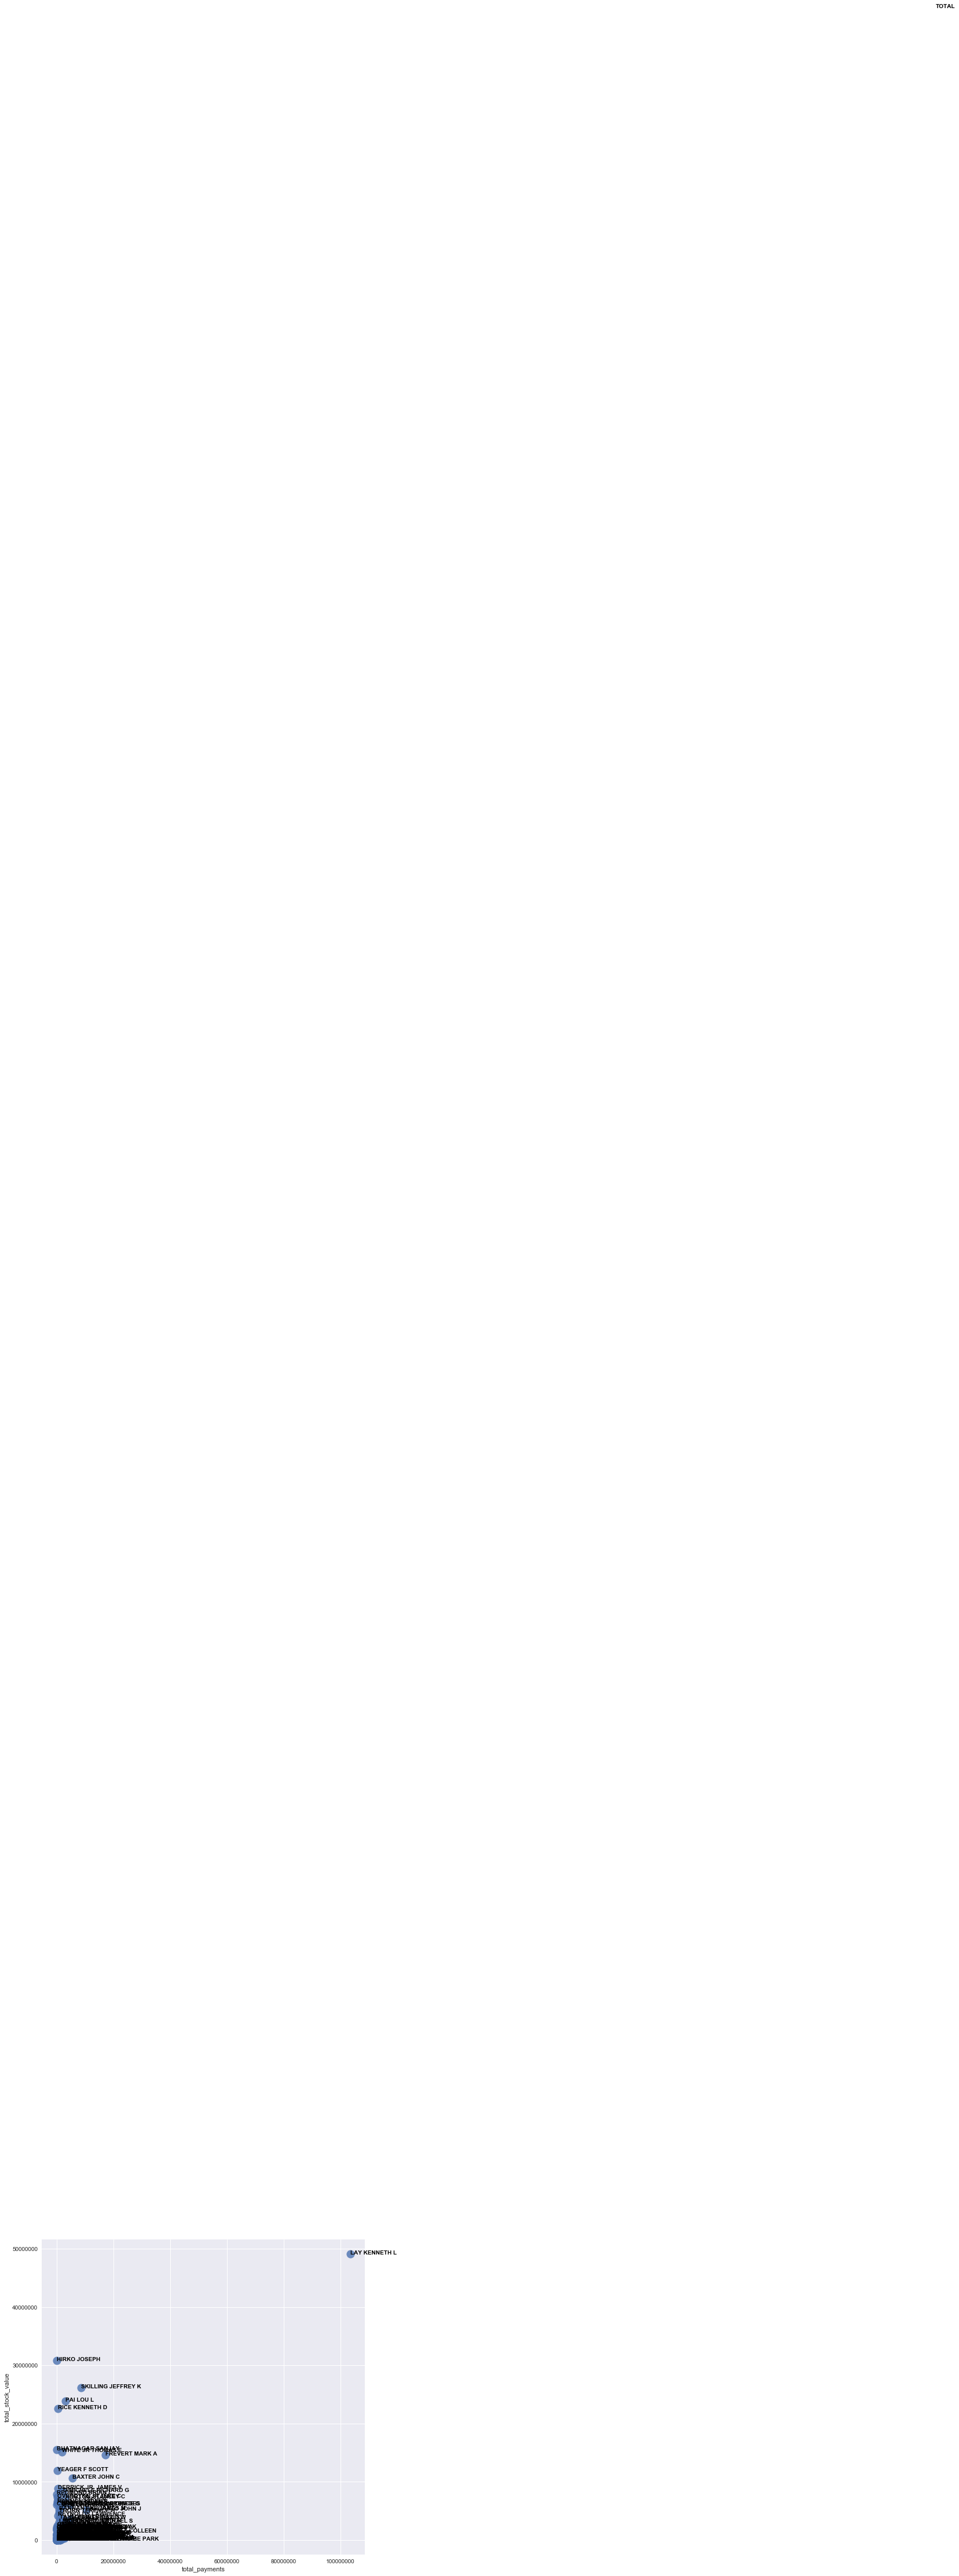

In [18]:
plt.figure(figsize = (10,10))
plt.ticklabel_format(style = 'plain')
p1 = sns.regplot(data = df.loc[df.name != 'TOTAL',:], x = 'total_payments', y = 'total_stock_value', fit_reg=False , marker= 'o', scatter_kws={'s':200})
for line in range(0, df.shape[0]):
     p1.text(df.total_payments[line]+2, df.total_stock_value[line]+2, df.name[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

<Figure size 1440x1440 with 0 Axes>

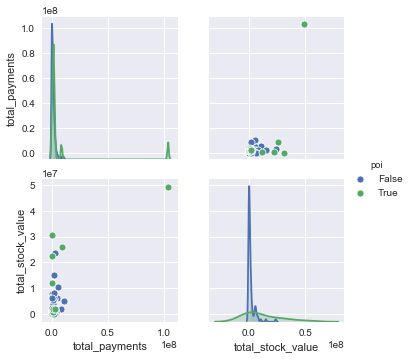

In [20]:
plt.figure(figsize = (20,20))
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['total_payments', 'total_stock_value'],
             hue = 'poi')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


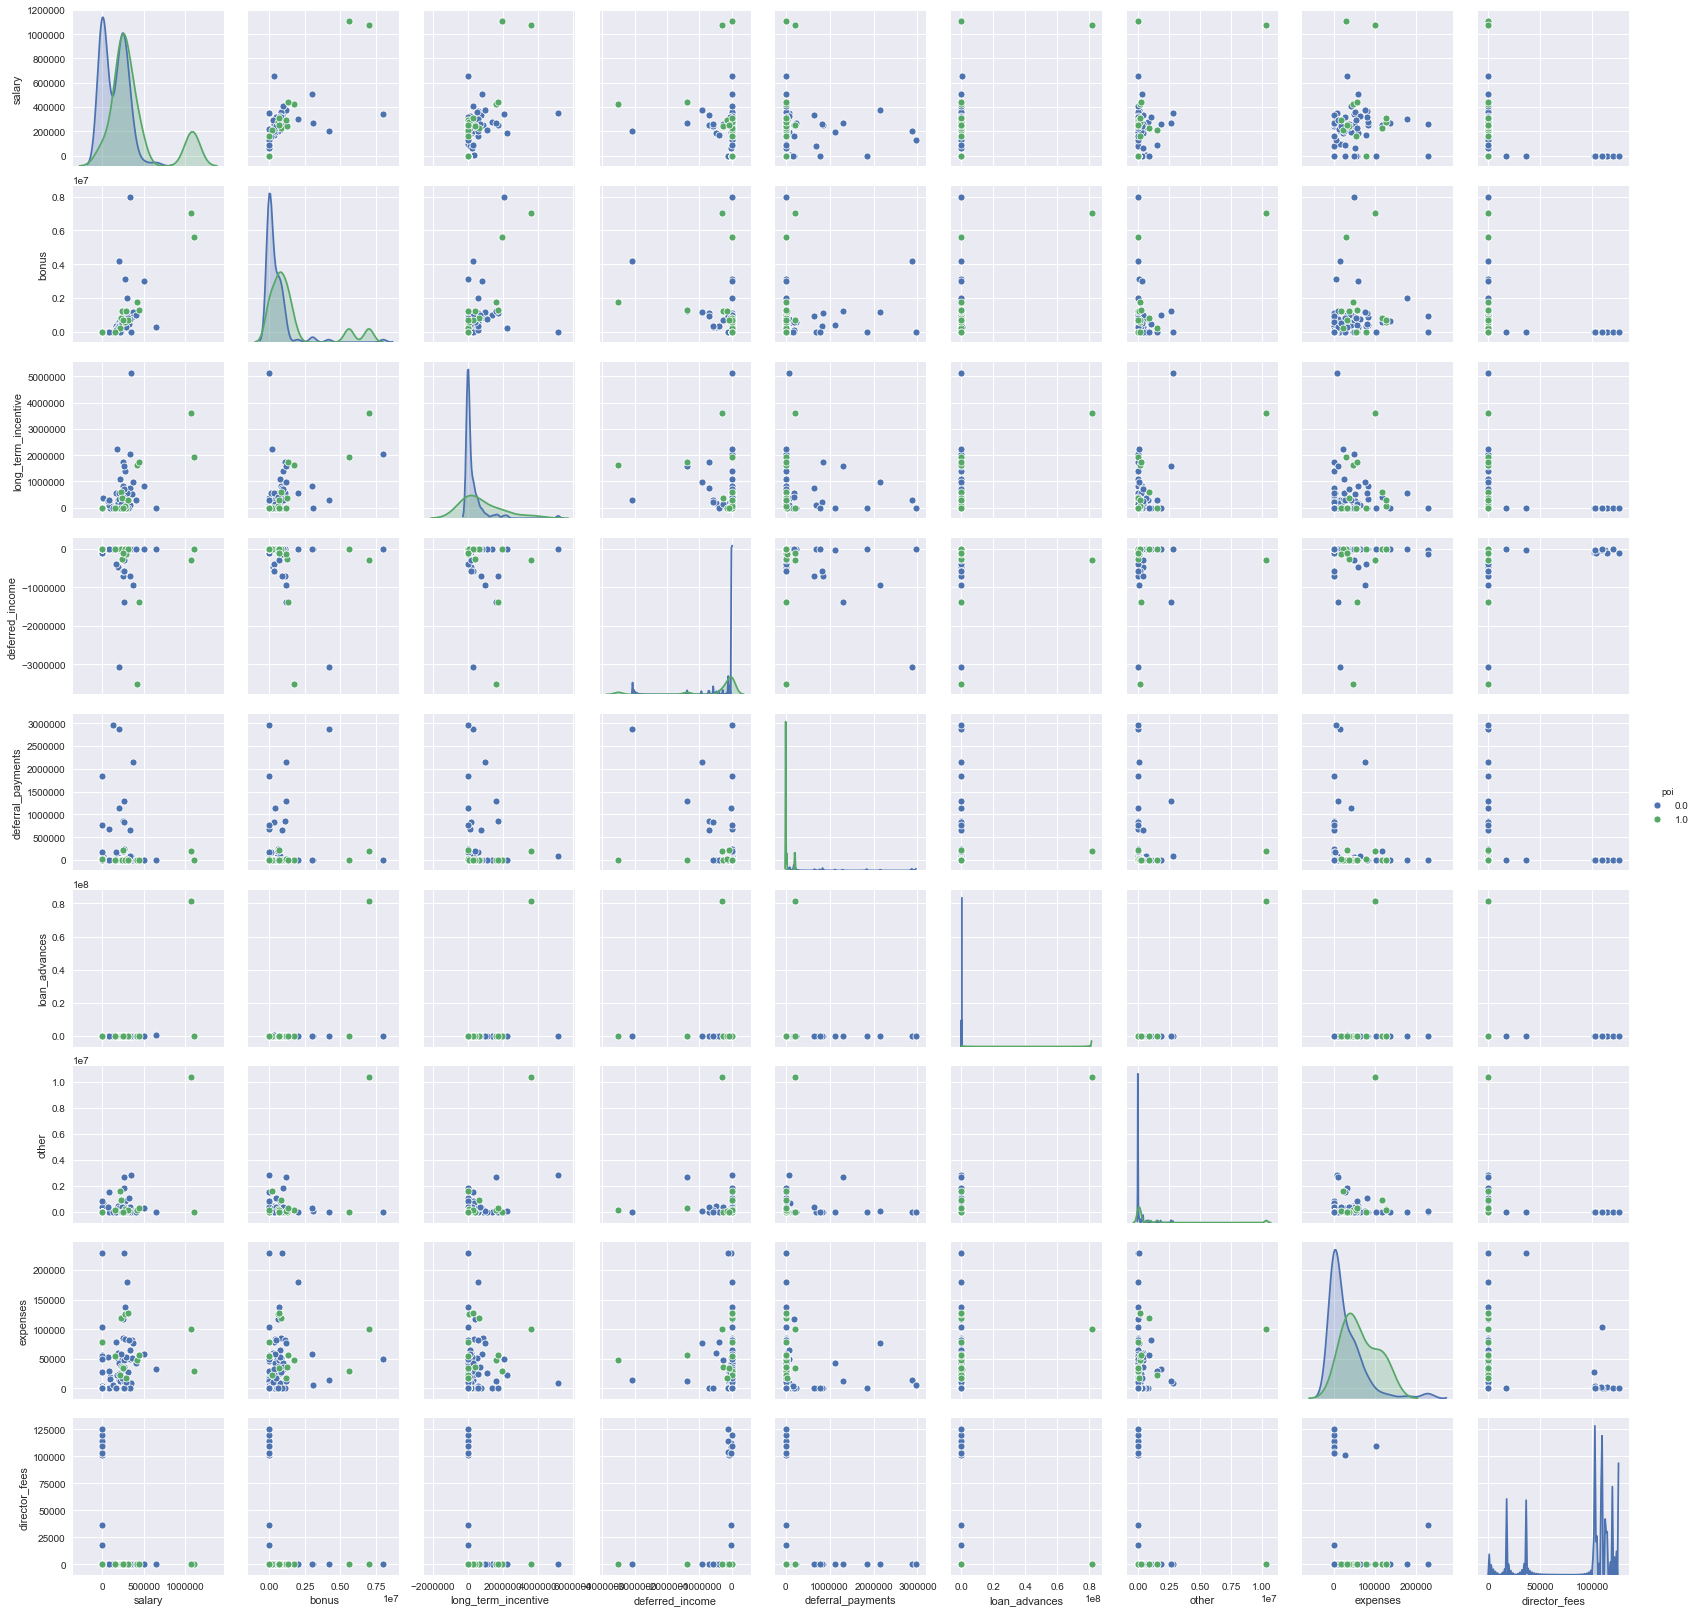

In [16]:
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees'],
             hue = 'poi')

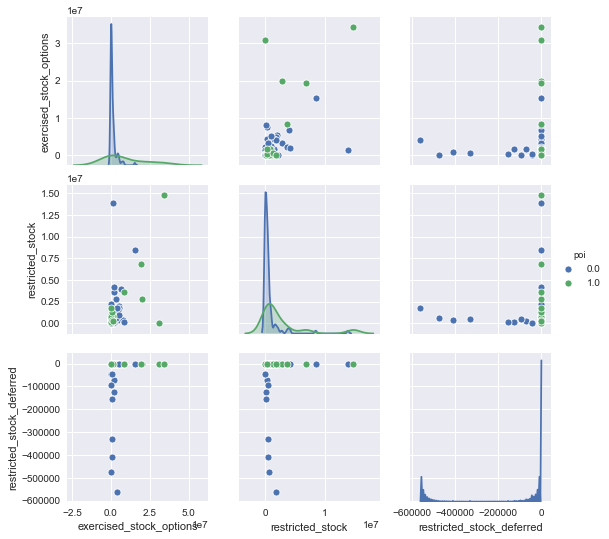

In [17]:
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred'],
             hue = 'poi')

## Mails

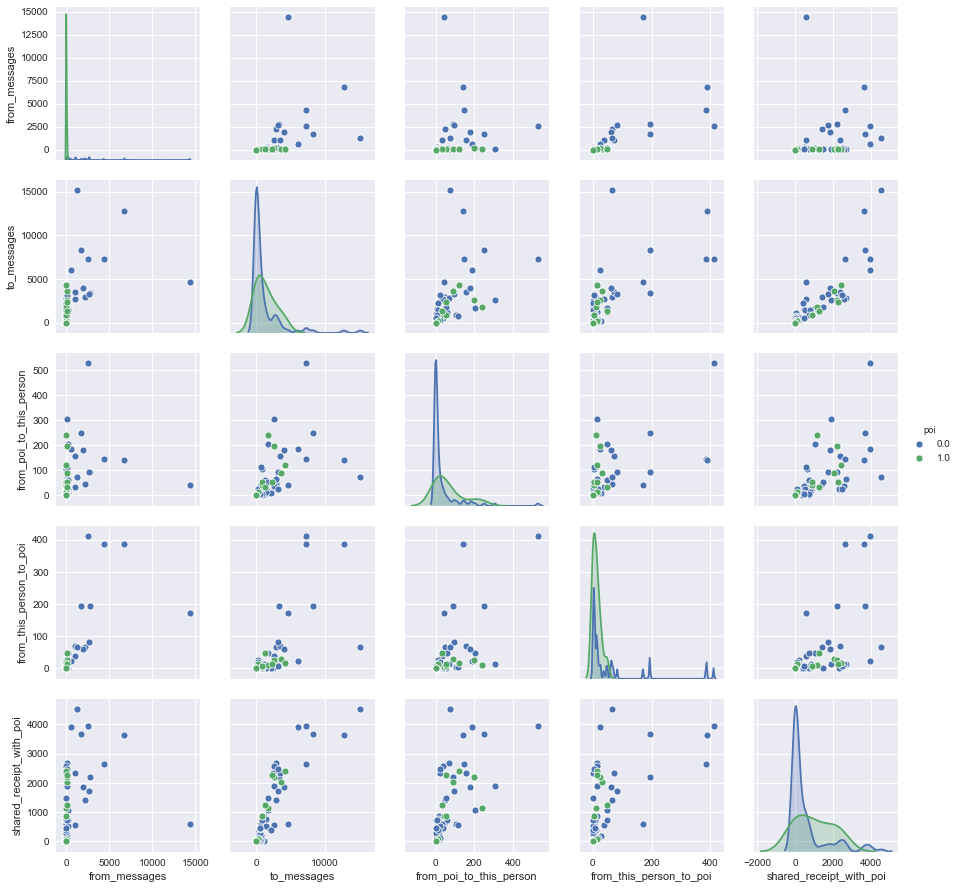

In [19]:
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',  'shared_receipt_with_poi'],
             hue = 'poi')

# Feature engineer
根據不同的情景，可以善用+, -, *, / 來創造新變數

大|c|d
:|:|:
小|a|b
y軸/x軸|小|大

點都貼在軸線上時用加減法，若有相關則用 * 或 / 
若兩類的分布點呈90度分佈用減法凸顯差異，若有相關用加法

使用時機：
- (1) + ： x + y之後的值有助於識別y 。當資料的濃度呈現如下：a < b ~ c < d 時。(有資料接近x與y軸的0時)
- (2) - ： x - y之後的值有助於識別y 。當資料的濃度呈現如下：a ~ d < | b - c | 時。（有資料接近x與y軸的0時）
- (3) * ： x * y之後的值有助於識別y 。當資料的濃度呈現如下：a < b ~ c < d 時。(無資料接近x與y軸的0時)
- (4) / ： x / y之後的值有助於識別y 。一類集中在b,另一類集中在c。a,d無明顯差異。（無資料接近x與y軸的0時）

In [18]:
# 對沒有mail的人標記
df['email_address'] = np.select([df.email_address.isna(),True], [1,0])

### 在pdf中被標註螢光筆的人名
雖然有助於模型,但不了解其意義，所以不採用

In [20]:
# # High Light name from the pdf
# HL1 = ['BAXTER, JOHN C', 'DERRICK JR., JAMES V', 'HIRKO, JOSEPH', 'LAY, KENNETH L', 'PAI, LOU L', 'RICE, KENNETH D', 'SKILLING, JEFFREY K', 'WHITE JR, THOMAS E', 'YEAGER, F SCOTT']
# HL2 = ['BAXTER, JOHN C', 'DERRICK JR., JAMES V', 'FREVERT, MARK A', 'HIRKO, JOSEPH', 'LAY, KENNETH L', 'PAI, LOU L', 'RICE, KENNETH D', 'SKILLING, JEFFREY K', 'WHITE JR, THOMAS E', 'YEAGER, F SCOTT']

# # footnote name from pdf
# FT1 = ['BAXTER, JOHN C', 'LAY, KENNETH L', 'SHELBY, REX', 'SHERRIFF, JOHN R', 'TILNEY, ELIZABETH A', 'URQUHART, JOHN A', 'WAKEHAM, JOHN', 'BANNANTINE, JAMES M', 'BERGSIEKER, RICHARD P', 'DIMICHELE, RICHARD G', 'ELLIOTT, STEVEN', 'FITZGERALD, JAY L', 'FREVERT, MARK A', 'GOLD, JOSEPH', 'KISHKILL, JOSEPH G', 'KITCHEN, LOUISE', 'THE TRAVEL AGENCY IN THE PARK']
# FT2 = ['BAXTER, JOHN C','LAY, KENNETH L','FREVERT, MARK A','THE TRAVEL AGENCY IN THE PARK']
 
# HL1 = pd.DataFrame(data=HL1, columns=['name'])
# HL2 = pd.DataFrame(data=HL2, columns=['name'])
# FT1 = pd.DataFrame(data=FT1, columns=['name'])
# FT2 = pd.DataFrame(data=FT2, columns=['name'])

# HL1['HL1'] = 1
# HL2['HL2'] = 1
# FT1['FT1'] = 1
# FT2['FT2'] = 1

# HL1['name'] = HL1.name.apply(lambda x: x.replace(',',''))
# HL2['name'] = HL2.name.apply(lambda x: x.replace(',',''))
# FT1['name'] = FT1.name.apply(lambda x: x.replace(',',''))
# FT2['name'] = FT2.name.apply(lambda x: x.replace(',',''))

# # delete data from testtest's name == 'TOTAL'
# # fix the error data
# df = pd.merge(df, HL1, how = 'left', on='name')
# df = pd.merge(df, HL2, how = 'left', on='name')
# df = pd.merge(df, FT1, how = 'left', on='name')
# df = pd.merge(df, FT2, how = 'left', on='name')

# df.loc[df.HL1.isna(), 'HL1'] = 0
# df.loc[df.HL2.isna(), 'HL2'] = 0
# df.loc[df.FT1.isna(), 'FT1'] = 0
# df.loc[df.FT2.isna(), 'FT2'] = 0

標註每個人有多少個0

In [6]:
# # 填補0
# for dtype, feature in zip(df.dtypes, df.columns):
#     if dtype != 'object':
#         df[feature] = df[feature].fillna(0)

# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 50 columns):
name                             146 non-null object
bonus                            146 non-null float64
deferral_payments                146 non-null float64
deferred_income                  146 non-null float64
director_fees                    146 non-null float64
email_address                    111 non-null object
exercised_stock_options          146 non-null float64
expenses                         146 non-null float64
from_messages                    146 non-null float64
from_poi_to_this_person          146 non-null float64
from_this_person_to_poi          146 non-null float64
loan_advances                    146 non-null float64
long_term_incentive              146 non-null float64
other                            146 non-null float64
poi                              113 non-null object
restricted_stock                 146 non-null float64
restricted_stock_deferred        1

In [7]:
# 將目標變數整理成1,0的形式，並在資料中註記資料屬於Train或Test
df['poi'] = np.select([df.poi.isna(), df.poi == True, True], [np.nan, 1, 0])
df['Note'] = np.select([df.poi.isna(), True], ['Test', 'Train'])

,name,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,email_address,poi,Note
0,RICE KENNETH D,420636.0,1750000.0,1617011.0,-3504386.0,NaN,NaN,174839.0,46950.0,NaN,505050.0,19794175.0,2748364.0,NaN,22542539.0,18.0,905.0,42.0,4.0,864.0,ken.rice@enron.com,1.0,Train
1,SKILLING JEFFREY K,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,8682716.0,19250000.0,6843672.0,NaN,26093672.0,108.0,3627.0,88.0,30.0,2042.0,jeff.skilling@enron.com,1.0,Train
2,SHELBY REX,211844.0,200000.0,NaN,-4167.0,NaN,NaN,1573324.0,22884.0,NaN,2003885.0,1624396.0,869220.0,NaN,2493616.0,39.0,225.0,13.0,14.0,91.0,rex.shelby@enron.com,1.0,Train
3,KOPPER MICHAEL J,224305.0,800000.0,602671.0,NaN,NaN,NaN,907502.0,118134.0,NaN,2652612.0,NaN,985032.0,NaN,985032.0,NaN,NaN,NaN,NaN,NaN,michael.kopper@enron.com,1.0,Train
4,CALGER CHRISTOPHER F,240189.0,1250000.0,375304.0,-262500.0,NaN,NaN,486.0,35818.0,NaN,1639297.0,NaN,126027.0,NaN,126027.0,144.0,2598.0,199.0,25.0,2188.0,christopher.calger@enron.com,1.0,Train
5,HIRKO JOSEPH,NaN,NaN,NaN,NaN,10259.0,NaN,2856.0,77978.0,NaN,91093.0,30766064.0,NaN,NaN,30766064.0,NaN,NaN,NaN,NaN,NaN,joe.hirko@enron.com,1.0,Train
6,YEAGER F SCOTT,158403.0,NaN,NaN,NaN,NaN,NaN,147950.0,53947.0,NaN,360300.0,8308552.0,3576206.0,NaN,11884758.0,NaN,NaN,NaN,NaN,NaN,scott.yeager@enron.com,1.0,Train
7,COLWELL WESLEY,288542.0,1200000.0,NaN,-144062.0,27610.0,NaN,101740.0,16514.0,NaN,1490344.0,NaN,698242.0,NaN,698242.0,40.0,1758.0,240.0,11.0,1132.0,wes.colwell@enron.com,1.0,Train
8,LAY KENNETH L,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,103559793.0,34348384.0,14761694.0,NaN,49110078.0,36.0,4273.0,123.0,16.0,2411.0,kenneth.lay@enron.com,1.0,Train
9,GLISAN JR BEN F,274975.0,600000.0,71023.0,NaN,NaN,NaN,200308.0,125978.0,NaN,1272284.0,384728.0,393818.0,NaN,778546.0,16.0,873.0,52.0,6.0,874.0,ben.glisan@enron.com,1.0,Train


In [21]:
# salary + bonus
# salary + long_term_incentive
# salary - deferred_income
# salary - deferral_payments
# salary + other
# salary + expenses
# salary - director_fees
# bonus + long_term_incentive
# bonus - deferred_income
# bonus - deferral_payments
# bonus - other
# bonus + expenses
# bonus - director_fees
# long_term_incentive + deferred_income
# long_term_incentive - deferral_payments
# long_term_incentive - other
# long_term_incentive + expenses
# long_term_incentive - director_fees
# deferred_income - deferral_payments
# deferred_income - other
# deferred_income + expenses
# deferred_income - director_fees
# deferral_payments - other
# deferral_payments - expenses
# deferral_payments + director_fees
# other + expenses
# other - director_fees
# expenses - director_fees

# df['salary_plus_bonus'] = df.salary + df.bonus
# df['DeferralPayments_divided_Bonus'] = df.deferral_payments / df.bonus
# df['DeferralPayments_divided_LongTermIncentive'] = df.deferral_payments / df.long_term_incentive
# df['DirectorFees_divided_LongTermIncentive'] = df.director_fees / df.long_term_incentive
# df['DeferralPayments_divided_DeferredIncome'] = df.deferral_payments / df.deferred_income


# multiplied

In [22]:
df

,name,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,email_address,poi,Note
0,RICE KENNETH D,420636.0,1750000.0,1617011.0,-3504386.0,0.0,0.0,174839.0,46950.0,0.0,505050.0,19794175.0,2748364.0,0.0,22542539.0,18.0,905.0,42.0,4.0,864.0,0,1.0,Train
1,SKILLING JEFFREY K,1111258.0,5600000.0,1920000.0,0.0,0.0,0.0,22122.0,29336.0,0.0,8682716.0,19250000.0,6843672.0,0.0,26093672.0,108.0,3627.0,88.0,30.0,2042.0,0,1.0,Train
2,SHELBY REX,211844.0,200000.0,0.0,-4167.0,0.0,0.0,1573324.0,22884.0,0.0,2003885.0,1624396.0,869220.0,0.0,2493616.0,39.0,225.0,13.0,14.0,91.0,0,1.0,Train
3,KOPPER MICHAEL J,224305.0,800000.0,602671.0,0.0,0.0,0.0,907502.0,118134.0,0.0,2652612.0,0.0,985032.0,0.0,985032.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Train
4,CALGER CHRISTOPHER F,240189.0,1250000.0,375304.0,-262500.0,0.0,0.0,486.0,35818.0,0.0,1639297.0,0.0,126027.0,0.0,126027.0,144.0,2598.0,199.0,25.0,2188.0,0,1.0,Train
5,HIRKO JOSEPH,0.0,0.0,0.0,0.0,10259.0,0.0,2856.0,77978.0,0.0,91093.0,30766064.0,0.0,0.0,30766064.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Train
6,YEAGER F SCOTT,158403.0,0.0,0.0,0.0,0.0,0.0,147950.0,53947.0,0.0,360300.0,8308552.0,3576206.0,0.0,11884758.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Train
7,COLWELL WESLEY,288542.0,1200000.0,0.0,-144062.0,27610.0,0.0,101740.0,16514.0,0.0,1490344.0,0.0,698242.0,0.0,698242.0,40.0,1758.0,240.0,11.0,1132.0,0,1.0,Train
8,LAY KENNETH L,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,0.0,103559793.0,34348384.0,14761694.0,0.0,49110078.0,36.0,4273.0,123.0,16.0,2411.0,0,1.0,Train
9,GLISAN JR BEN F,274975.0,600000.0,71023.0,0.0,0.0,0.0,200308.0,125978.0,0.0,1272284.0,384728.0,393818.0,0.0,778546.0,16.0,873.0,52.0,6.0,874.0,0,1.0,Train


# Train model

In [37]:
df_train = df.loc[df.Note == 'Train']
X_train = df_train.drop(['name', 'Note', 'poi'], axis=1)
Y_train = df_train.loc[:,'poi']

df_test = df.loc[df.Note == 'Test']
print(X_train.shape)
print(Y_train.shape)

(113, 20)
(113,)


In [38]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 4)
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(90, 20)
(23, 20)
(90,)
(23,)


## Gradient Boosting

### Default parameters

In [39]:
GBDT = GradientBoostingClassifier()
GBDT.fit(X = X_train, y = Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [40]:
print(f'AUC: {roc_auc_score(Y_valid, GBDT.predict_proba(X_valid)[:,1])}')
print(f'F1-score: {f1_score(Y_valid, GBDT.predict(X_valid))}')

AUC: 0.8421052631578948
F1-score: 0.3333333333333333


### Gridsearch

In [41]:
GBDT_GridSearch = GridSearchCV(estimator = GradientBoostingClassifier(),
                               param_grid = dict(learning_rate = [0.1, 0.05, 0.01],
                                                 max_depth = [2, 3, 4, 5],
                                                 n_estimators = [100, 200, 300, 400]),
                               scoring="neg_mean_squared_error",
                               n_jobs=-1,
                               verbose=1)

# 開始搜尋最佳參數
GBDT_GridSearch_result = GBDT_GridSearch.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    5.4s finished


In [42]:
GBDT_GridSearch_result.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [43]:
print(f'AUC: {roc_auc_score(Y_valid, GBDT_GridSearch_result.predict_proba(X_valid)[:,1])}')
print(f'F1-score: {f1_score(Y_valid, GBDT_GridSearch_result.predict(X_valid))}')

AUC: 0.8421052631578948
F1-score: 0.4


### Train final model

## Randomforest

### Default parameters

In [44]:
RF = RandomForestClassifier()
RF.fit(X = X_train, y = Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
print(f'AUC: {roc_auc_score(Y_valid, GBDT.predict_proba(X_valid)[:,1])}')
print(f'F1-score: {f1_score(Y_valid, GBDT.predict(X_valid))}')

AUC: 0.8421052631578948
F1-score: 0.3333333333333333


### Gridsearch

In [47]:
RF_GridSearch = GridSearchCV(estimator = RandomForestClassifier(),
                             param_grid = dict(n_estimators = [100, 200, 300, 400],
                                                 max_features = [3, 4, 5, 6]),
                               scoring="neg_mean_squared_error",
                               n_jobs=-1,
                               verbose=1)

# 開始搜尋最佳參數
RF_GridSearch_result = RF_GridSearch.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.3s finished


In [50]:
print(f'AUC: {roc_auc_score(Y_valid, RF_GridSearch.predict_proba(X_valid)[:,1])}')
print(f'F1-score: {f1_score(Y_valid, RF_GridSearch.predict(X_valid))}')

AUC: 0.8552631578947368
F1-score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Train final model

In [19]:
# train_X = df2[:train_num]
estimator = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='sqrt')
print(f"score: {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}")
estimator = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='log2')
print(f"score: {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}")
estimator = RandomForestClassifier(n_estimators=500, criterion='gini', max_features=5)
print(f"score: {cross_val_score(estimator, train_X, train_Y, cv=5).mean()}")

score: 0.9466026726896292
score: 0.9279879540749107
score: 0.9105966497270845


In [20]:
clf3 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='sqrt').fit(train_X, train_Y)
clf4 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='log2').fit(train_X, train_Y)
clf5 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features=23).fit(train_X, train_Y)

In [21]:
test_X = df2[train_num:]
test_X['poi'] = clf3.predict_proba(test_X)[:, 1]
submit = pd.concat([test_X.reset_index(),test_name.reset_index()],axis=1).loc[:,['name','poi']]
submit.loc[submit.name == 'TOTAL', 'poi'] = 0
submit

C:\Users\TL_Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,poi
0,BELDEN TIMOTHY N,0.160
1,BOWEN JR RAYMOND M,0.210
2,HANNON KEVIN P,0.394
3,DELAINEY DAVID W,0.062
4,CAUSEY RICHARD A,0.266
5,HICKERSON GARY J,0.182
6,FREVERT MARK A,0.456
7,CHAN RONNIE,0.004
8,DONAHUE JR JEFFREY M,0.196
9,REYNOLDS LAWRENCE,0.042


In [22]:
submit.to_csv("./python_mod15.csv", sep=',', encoding='utf-8',index=False)

PermissionError: [Errno 13] Permission denied: './python_mod15.csv'

# Test Xgboost

In [24]:
## Test xgbboost
import xgboost as xgb
df3 = df2

In [25]:
df3['poi'] = train_Y
train_Y = np.array(df3.ix[:(train_num-1), 'poi'].tolist())
test_Y = np.array(df3.ix[train_num:,'poi'].tolist())
print(train_Y)
print(test_Y)
df3 = df3.drop('poi',axis=1)
train_X = np.array(df3[:train_num].as_matrix())
test_X = np.array(df3[train_num:].as_matrix())
print(train_X.shape)
print(test_X.shape)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
(113, 64)
(33, 64)


C:\Users\TL_Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\TL_Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\TL_Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate f

In [26]:
xgbTree1 = xgb.XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.1,silent=True).fit(train_X, train_Y)
xgbTree3 = xgb.XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.01,silent=True).fit(train_X, train_Y)
xgbTree2 = xgb.XGBClassifier(max_depth=6, n_estimators=1000, learning_rate=0.1,silent=True).fit(train_X, train_Y)
xgbTree4 = xgb.XGBClassifier(max_depth=5, n_estimators=200, learning_rate=0.01,silent=True).fit(train_X, train_Y)

ValueError: y contains previously unseen labels: [nan]

In [25]:
predictions1 = xgbTree1.predict_proba(test_X)[:,1]
predictions2 = xgbTree2.predict_proba(test_X)[:,1]
predictions3 = xgbTree3.predict_proba(test_X)[:,1]
predictions4 = xgbTree4.predict_proba(test_X)[:,1]

In [27]:
predictions1

array([0.5578274 , 0.5631163 , 0.95144403, 0.02607056, 0.6913201 ,
       0.06112979, 0.8680056 , 0.00457499, 0.33702016, 0.02477626,
       0.00302141, 0.00274535, 0.07385684, 0.00355908, 0.16217855,
       0.00254542, 0.00461711, 0.37449127, 0.04240084, 0.00340199,
       0.7766203 , 0.85700506, 0.01675512, 0.00619672, 0.00471381,
       0.01144694, 0.32210508, 0.01434355, 0.34751266, 0.03569357,
       0.00386844, 0.05509096, 0.9481927 ], dtype=float32)

In [29]:
submission = pd.DataFrame({ 'name': test['name'],
                            'poi': predictions1})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("python_mod11.csv", index=False)

In [30]:
submission = pd.DataFrame({ 'name': test['name'],
                            'poi': predictions2})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("python_mod12.csv", index=False)

In [31]:
submission = pd.DataFrame({ 'name': test['name'],
                            'poi': predictions3})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("python_mod13.csv", index=False)

In [32]:
submission = pd.DataFrame({ 'name': test['name'],
                            'poi': predictions3})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("python_mod14.csv", index=False)

# ref

在圖形中加入名稱
https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/